# Q* Learning with Gym FrozenLake-v0 "4x4"

### Import the dependencies

* Numpy - a library of linear algebra
* Gym - a library of environments
* Random - a library which helps us to generate random numbers
* Matplotlib - a plotting library

In [1]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
%matplotlib inline

### Create the FrozenLake environment

In [2]:
env = gym.make('FrozenLake-v0', map_name="4x4", is_slippery=False) # We reduce randomness from our environment

### Create Q-table and initialize it

In [3]:
action_size = env.action_space.n
state_size = env.observation_space.n

print("Action size is", action_size)
print("State size is", state_size)

Action size is 4
State size is 16


In [4]:
qtable = np.zeros((state_size, action_size))

### Create the hyperparameters

In [5]:
total_train_episodes = 3000  # Total episodes, which we will use to train our algorithm

learning_rate = 0.8
gamma = 0.9                  # Discounting rate

# Exploration parameters
epsilon = 1.0                # Exploration rate
max_epsilon = 1.0            # Exploration probability at start 
min_epsilon = 0.01           # Minimum exploration probability
decay_rate = 0.003           # Exponential decay rate for exploration probability

### The Q learning algorithm

In [6]:
rewards = []
avg_rewards = []
best_avg_reward = 0

for episode in range(total_train_episodes):
    # Reset the environment
    state = env.reset()       # reset() returns an initial observation
    total_rewards = 0
    
    while True:
        # First we randomize a number
        tradeoff = random.uniform(0, 1) # The tradeoff between exploration and explotation
        
        # If this number is greater than epsilon, then we do exploitation (taking the biggest Q value for this state)
        if tradeoff > epsilon:
            action = np.argmax(qtable[state, :]) # numpy.argmax returns the indices of the maximum values along an axis
            
        # Else doing a random choice
        else:
            action = env.action_space.sample()
        
        # Take the action (a) and observe the outcome state(s') and a reward(r)
        new_state, reward, done, _ = env.step(action)
        
        # Update Q(s, a)
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma *
                                    np.max(qtable[new_state, :]) - qtable[state, action])
        
        # Our new state is state
        state = new_state
        
        # Calculate total rewards for an episode
        total_rewards += reward
        
        if done:
            break
    
    rewards.append(total_rewards)
        
    if episode >= 100:
        avg_reward = np.mean(rewards[episode-99:episode+1])
        avg_rewards.append(avg_reward)
        if avg_reward > best_avg_reward:
            best_avg_reward = avg_reward
    
    episode += 1
    
    # Reduce epsilon (because we need less and less exploration, and more and more exploatation)
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    
print("Best average reward is", best_avg_reward)
print(end='\n\n')
print("Our Q table after learning:", qtable, sep='\n')

Best average reward is 1.0


Our Q table after learning:
[[0.531441   0.59049    0.4782969  0.531441  ]
 [0.531441   0.         0.40603395 0.47820543]
 [0.47809115 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.80999959 0.         0.3980987 ]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.729      0.9        0.         0.72899872]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.9        0.729     ]
 [0.81       0.9        1.         0.81      ]
 [0.         0.         0.         0.        ]]


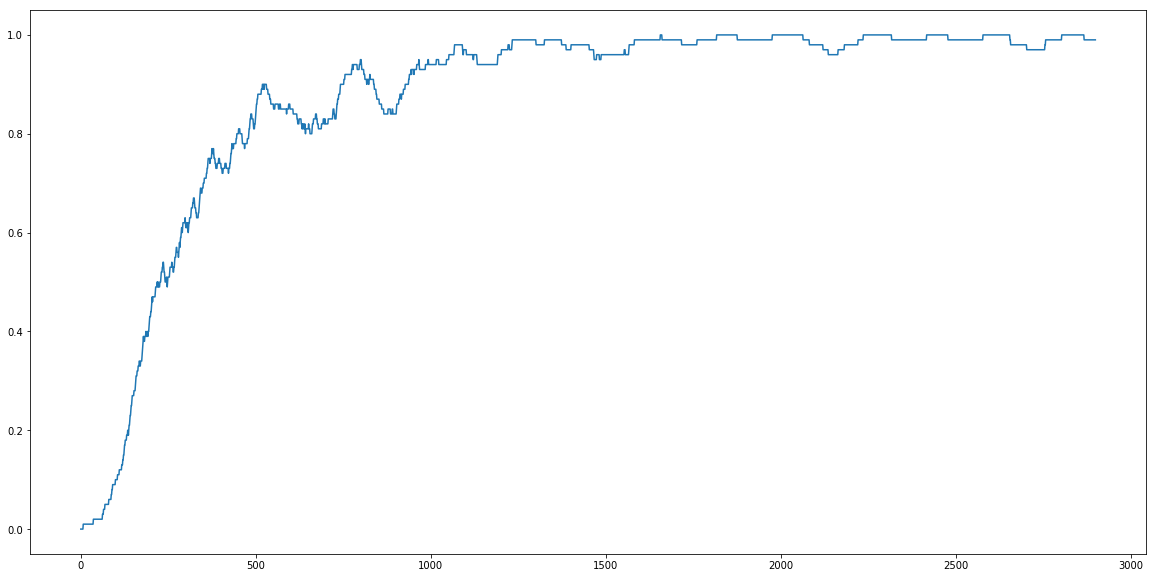

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(avg_rewards)
plt.show()

#### How we can see, to approximate FrozenLake "4x4" without slippery, using Q learning we need 1500 - 2000 iterations

# Use our Q-table to play FrozenLake

After 3000 episodes, our Q-table can be used as a "cheatsheet" to play FrozenLake

In [8]:
for episode in range(5):
    state = env.reset()
    print("Episode:", episode, end="\n\n")
    
    while True:
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state, :])
        
        new_state, reward, done, _ = env.step(action)
        
        state = new_state
        
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            break

env.close()

Episode: 0

  (Right)
SFFF
FHFH
FFFH
HFFG
Episode: 1

  (Right)
SFFF
FHFH
FFFH
HFFG
Episode: 2

  (Right)
SFFF
FHFH
FFFH
HFFG
Episode: 3

  (Right)
SFFF
FHFH
FFFH
HFFG
Episode: 4

  (Right)
SFFF
FHFH
FFFH
HFFG
